# Лабораторная работа 3. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы Григоренко Дарья БФИ2302
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Дарья\AppData\Local\Programs\Python\Python311\Lib\tkinter\__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Дарья\AppData\Local\Temp\ipykernel_5548\132387646.py", line 73, in run_algorithm
    distances = bellman_ford(self.graph, start_vertex)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Дарья\AppData\Local\Temp\ipykernel_5548\132387646.py", line 17, in bellman_ford
    distances[start] = 0
    ~~~~~~~~~^^^^^^^
IndexError: list assignment index out of range
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Дарья\AppData\Local\Programs\Python\Python311\Lib\tkinter\__init__.py", line 1967, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Дарья\AppData\Local\Temp\ipykernel_5548\132387646.py", line 73, in run_algorithm
    distances = bellman_ford(self.grap

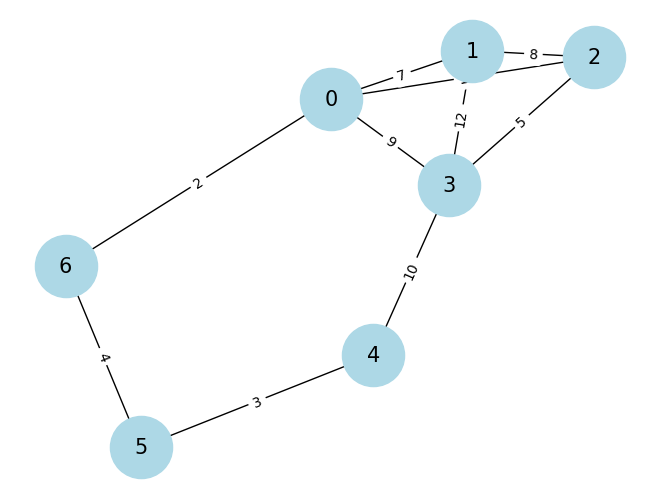

In [21]:
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
import networkx as nx
import matplotlib.pyplot as plt
import os
import time
import pandas as pd

def read_matrix(filename):
    with open(filename, 'r') as f:
        return [list(map(int, line.split())) for line in f]

def bellman_ford(graph, start):
    V = len(graph)
    distances = [float('inf')] * V  #расстояния
    distances[start] = 0  

    for _ in range(V - 1):   # длина пути
        for i in range(V):
            for j in range(V):
                if graph[i][j] != 0 and distances[i] + graph[i][j] < distances[j]:
                    distances[j] = distances[i] + graph[i][j]

    # отриц
    for i in range(V):
        for j in range(V):
            if graph[i][j] != 0 and distances[i] + graph[i][j] < distances[j]:
                return None  

    return distances

class GraphGUI:
    def __init__(self, root):
        self.root = root
        self.root.title("Алгоритм Беллмана-Форда")

        self.load_button = tk.Button(root, text="Загрузить граф", command=self.load_graph)
        self.load_button.pack()

        self.start_label = tk.Label(root, text="Выберите стартовую вершину:")
        self.start_label.pack()

        self.start_entry = tk.Entry(root)
        self.start_entry.pack()

        self.run_button = tk.Button(root, text="Запустить алгоритм", command=self.run_algorithm)
        self.run_button.pack()

        self.result_label = tk.Label(root, text="")
        self.result_label.pack()

        self.analyze_button = tk.Button(root, text="Анализ временной сложности", command=self.analyze_time_complexity)
        self.analyze_button.pack()

    def load_graph(self):
        filename = filedialog.askopenfilename(filetypes=[("Text files", "*.txt")])
        if filename:
            #matrix_type = input("Введите тип матрицы (adjacency/incidence): ").strip()
            self.graph = read_matrix(filename)

    def run_algorithm(self):
        if not hasattr(self, 'graph'):
            self.result_label.config(text="Граф не загружен!")
            return

        try:
            start_vertex = int(self.start_entry.get())
        except ValueError:
            self.result_label.config(text="Неверный номер вершины!")
            return

        distances = bellman_ford(self.graph, start_vertex)
        if distances is None:
            self.result_label.config(text="Граф содержит отрицательный цикл")
        else:
            self.result_label.config(text=f"Расстояния от вершины {start_vertex}: {distances}")
            self.visualize_graph()

    def visualize_graph(self):
        G = nx.Graph()
        edges = [(i, j, self.graph[i][j]) for i in range(len(self.graph)) for j in range(len(self.graph)) if self.graph[i][j] != 0]
        G.add_weighted_edges_from(edges)

        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=15)
        edge_labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
        plt.show()

    def analyze_time_complexity(self): #4
        folder_path = filedialog.askdirectory(title="Выберите папку с файлами графов")
        if not folder_path:
            return

        files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]

        if not files:
            messagebox.showerror("Ошибка", "В выбранной папке нет файлов .txt")
            return

        results = []

        for filename in files:
            graph = read_matrix(os.path.join(folder_path, filename))
            V = len(graph)
            E = sum(1 for i in range(V) for j in range(V) if graph[i][j] != 0)

            start_time = time.time()
            bellman_ford(graph, 0) 
            elapsed_time = (time.perf_counter() - start_time) % 1000000

            results.append((V, E, elapsed_time))

        # таблица
        df = pd.DataFrame(results, columns=["Число узлов", "Число рёбер", "Время (сек.)"])

        self.show_time_analysis(df)

    def show_time_analysis(self, df):
        top = tk.Toplevel(self.root)
        top.title("Анализ временной сложности")

        text = tk.Text(top, width=60, height=20)
        text.pack()

        # вывод в окно
        text.insert(tk.END, df.to_string(index=False))
        text.config(state=tk.DISABLED)

root = tk.Tk()
app = GraphGUI(root)
root.mainloop()


### Вывод